# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

1. There is a strong correlation between temperature and latitude. As you get closer to the equator (latitude 0) the temperature does increase.
2. There humidity is not dependent on the latitude, it is most likely dependent on wether the city is inland or by the coast.
3. Windspeed and cloudiness is not dependent on latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Import citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding latitude / longitude combination and cities
lat_lngs = []
cities = []

# Create a set of random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each latitude / longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Open WeatherMap API Key
api_key = weather_api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key +"&q="

# Cities weather data frame
cities_df = pd.DataFrame({"City":cities})
cities_df["Country"] = ""
cities_df["Temperature"] =""
cities_df["Humidity"] =""
cities_df["Cloudiness"] =""
cities_df["Windspeed"] =""
cities_df["Latitude"]=""
cities_df["Longitude"]=""
cities_df.head()
print("Beginning Data Retrieval")
print("------------------------")

for index, row in cities_df.iterrows():
    city =row["City"]
    response = requests.get(url+city)
    city_weather = response.json()
    print(f"Processing Record {index} | {city}")
    city_weather_url =response.url
    print(response.url)

    
    try:
        cities_df.loc[index,"Country"]=city_weather['sys']['country']
        cities_df.loc[index,"Temperature"]=city_weather['main']['temp']
        cities_df.loc[index,"Humidity"]=city_weather['main']['humidity']
        cities_df.loc[index,"Cloudiness"]=city_weather['clouds']['all']
        cities_df.loc[index,"Windspeed"]=city_weather['wind']['speed']
        cities_df.loc[index,"Latitude"]=city_weather['coord']['lat']
        cities_df.loc[index,"Longitude"]=city_weather["coord"]['lon']
        
    except (KeyError, IndexError):
        print(f"City not found... skipping.")

print("------------------------")
print("Data Retrieval Complete")
print("------------------------")

Beginning Data Retrieval
------------------------
Processing Record 0 | mayumba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=mayumba
Processing Record 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=punta%20arenas
Processing Record 2 | rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=rikitea
Processing Record 3 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=qaanaaq
Processing Record 4 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=lebu
Processing Record 5 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=illoqqortoormiut
City not found... skipping.
Processing Record 6 | hermanus
http://api.openweathe

Processing Record 56 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=puerto%20ayora
Processing Record 57 | anadyr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=anadyr
Processing Record 58 | temecula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=temecula
Processing Record 59 | puerto madero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=puerto%20madero
Processing Record 60 | east london
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=east%20london
Processing Record 61 | birao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=birao
Processing Record 62 | cidreira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c8

Processing Record 113 | la palma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=la%20palma
Processing Record 114 | ozinki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=ozinki
Processing Record 115 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=dikson
Processing Record 116 | barentsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=barentsburg
City not found... skipping.
Processing Record 117 | dhamrai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=dhamrai
Processing Record 118 | georgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=georgetown
Processing Record 119 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 169 | port lincoln
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=port%20lincoln
Processing Record 170 | butaritari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=butaritari
Processing Record 171 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=kaitangata
Processing Record 172 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=chokurdakh
Processing Record 173 | maniitsoq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=maniitsoq
Processing Record 174 | nova vicosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=nova%20vicosa
Processing Record 175 | umzimvubu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&AP

Processing Record 224 | thyolo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=thyolo
Processing Record 225 | poso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=poso
Processing Record 226 | laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=laguna
Processing Record 227 | paradwip
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=paradwip
City not found... skipping.
Processing Record 228 | itapirapua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=itapirapua
Processing Record 229 | klaksvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=klaksvik
Processing Record 230 | kandrian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc0991

Processing Record 279 | qafqafa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=qafqafa
Processing Record 280 | wonthaggi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=wonthaggi
Processing Record 281 | oranjestad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=oranjestad
Processing Record 282 | lubyany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=lubyany
Processing Record 283 | bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=bambous%20virieux
Processing Record 284 | ende
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=ende
Processing Record 285 | pemangkat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878

Processing Record 336 | songea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=songea
Processing Record 337 | mossoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=mossoro
Processing Record 338 | kamenskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=kamenskoye
City not found... skipping.
Processing Record 339 | kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=kamenka
Processing Record 340 | zhigansk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=zhigansk
Processing Record 341 | xunchang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=xunchang
Processing Record 342 | aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01c

Processing Record 393 | aksarka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=aksarka
Processing Record 394 | izhma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=izhma
Processing Record 395 | maarianhamina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=maarianhamina
Processing Record 396 | bam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=bam
Processing Record 397 | san cristobal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=san%20cristobal
Processing Record 398 | wuwei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=wuwei
Processing Record 399 | beyneu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&

Processing Record 449 | sorland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=sorland
Processing Record 450 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=kruisfontein
Processing Record 451 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=fairbanks
Processing Record 452 | asyut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=asyut
Processing Record 453 | bilma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=bilma
Processing Record 454 | diamantino
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=diamantino
Processing Record 455 | cangzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c

Processing Record 505 | calama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=calama
Processing Record 506 | smithers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=smithers
Processing Record 507 | acarau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=acarau
Processing Record 508 | nyurba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=nyurba
Processing Record 509 | angoche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=angoche
Processing Record 510 | binzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=binzhou
Processing Record 511 | vadlapudi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=vadlapudi

Processing Record 561 | haverfordwest
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=haverfordwest
Processing Record 562 | hargeysa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=hargeysa
Processing Record 563 | russell
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=russell
Processing Record 564 | roseto degli abruzzi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=roseto%20degli%20abruzzi
Processing Record 565 | kingaroy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=kingaroy
Processing Record 566 | auburndale
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9cdee01cc09918c878869c7327c2c68f&q=auburndale
Processing Record 567 | henties bay
http://api.openweathermap.org/data/2.5/weather?units=I

In [4]:
# Display Cities
print(cities_df)

             City Country Temperature Humidity Cloudiness Windspeed Latitude  \
0         mayumba      GA       79.81       77         98       5.3   -3.432   
1    punta arenas      CL       41.11       56          0     17.27   -53.15   
2         rikitea      PF       77.02       74         72     23.62 -23.1203   
3         qaanaaq      GL       19.09       70         16      5.21   77.484   
4            lebu      CL       52.43       78         98     12.66 -37.6167   
..            ...     ...         ...      ...        ...       ...      ...   
600       bichura      RU       40.08       40         90       1.1  50.5881   
601     nantucket      US       54.95       83        100     12.66  41.2835   
602     samarinda      ID       74.48       97        100      0.98     -0.5   
603       manggar      ID       82.08       80         99      2.59  -2.8833   
604     liverpool      GB       56.05       48         40      6.91  53.4106   

    Longitude  
0     10.6554  
1    -7

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Remove any NA values from dataframe
cities_df.dropna(axis=0, inplace=True)

# View dataframe
cities_df.to_csv('city_data_output.csv')
cities_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude
0,mayumba,GA,79.81,77,98,5.3,-3.432,10.6554
1,punta arenas,CL,41.11,56,0,17.27,-53.15,-70.9167
2,rikitea,PF,77.02,74,72,23.62,-23.1203,-134.9692
3,qaanaaq,GL,19.09,70,16,5.21,77.484,-69.3632
4,lebu,CL,52.43,78,98,12.66,-37.6167,-73.65


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# View data type for each column
cities_df.dtypes

City           object
Country        object
Temperature    object
Humidity       object
Cloudiness     object
Windspeed      object
Latitude       object
Longitude      object
dtype: object

In [7]:
# Change data types to float
cities_df["Temperature"]=pd.to_numeric(cities_df["Temperature"])
cities_df["Humidity"]=pd.to_numeric(cities_df["Humidity"])
cities_df["Cloudiness"]=pd.to_numeric(cities_df["Cloudiness"])
cities_df["Windspeed"]=pd.to_numeric(cities_df["Windspeed"])
cities_df["Latitude"]=pd.to_numeric(cities_df["Latitude"])
cities_df["Longitude"]=pd.to_numeric(cities_df["Longitude"])
cities_df.dtypes

City            object
Country         object
Temperature    float64
Humidity       float64
Cloudiness     float64
Windspeed      float64
Latitude       float64
Longitude      float64
dtype: object

In [8]:
# Find if any humidity is over 100% by finding max value for dataframe
cities_df["Humidity"].max()

100.0

No Cities that have over 100% humidity


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Not needed since there are no cities with humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [10]:
# Create Variables for plotting

lat=cities_df["Latitude"]
max_temp=cities_df["Temperature"]
humidity=cities_df["Humidity"]
cloudiness=cities_df["Cloudiness"]
windspeed=cities_df["Windspeed"]

## Latitude vs. Temperature Plot

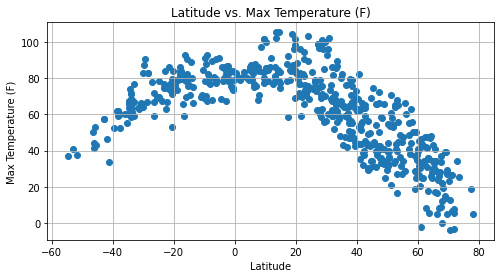

In [11]:
# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(lat,max_temp)

# Create Labels and Title
plt.title("Latitude vs. Max Temperature (F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Display
plt.show()


## Latitude vs. Humidity Plot

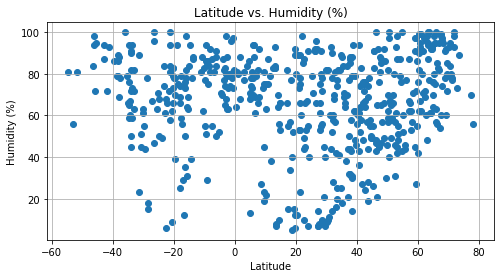

In [12]:
# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(lat,humidity)

# Create Labels and Title
plt.title("Latitude vs. Humidity (%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Display
plt.show()

## Latitude vs. Cloudiness Plot

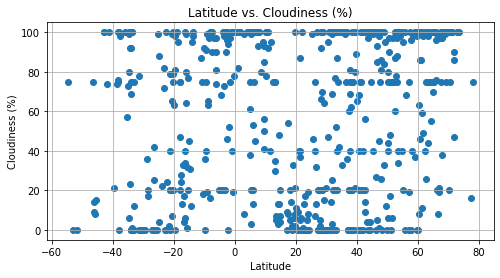

In [13]:
# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(lat,cloudiness)

# Create Labels and Title
plt.title("Latitude vs. Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Display
plt.show()

## Latitude vs. Wind Speed Plot

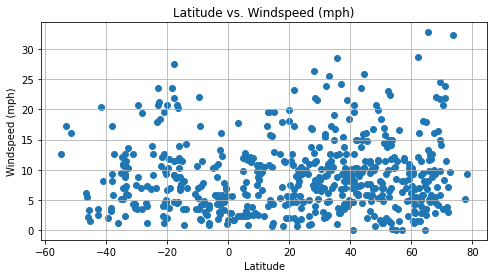

In [14]:
# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(lat,windspeed)

# Create Labels and Title
plt.title("Latitude vs. Windspeed (mph)")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid(True)

# Display
plt.show()

## Linear Regression

In [15]:
# Create Northern Hemisphere Dataframe
northern_df=cities_df.loc[cities_df["Latitude"]>=0]

northern_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude
3,qaanaaq,GL,19.09,70.0,16.0,5.21,77.4840,-69.3632
7,yevlax,AZ,82.38,36.0,0.0,8.05,40.6089,47.1492
8,norman wells,CA,30.24,80.0,75.0,8.05,65.2820,-126.8329
10,mirabad,AF,96.19,10.0,95.0,6.51,30.4362,61.8383
11,albany,US,45.07,64.0,56.0,5.99,42.6001,-73.9662


In [16]:
# Look at the data types
northern_df.dtypes

City            object
Country         object
Temperature    float64
Humidity       float64
Cloudiness     float64
Windspeed      float64
Latitude       float64
Longitude      float64
dtype: object

In [17]:
# Create Southern Hemisphere Dataframe
southern_df=cities_df.loc[cities_df["Latitude"]<0]

southern_df.head()

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude
0,mayumba,GA,79.81,77.0,98.0,5.30,-3.4320,10.6554
1,punta arenas,CL,41.11,56.0,0.0,17.27,-53.1500,-70.9167
2,rikitea,PF,77.02,74.0,72.0,23.62,-23.1203,-134.9692
4,lebu,CL,52.43,78.0,98.0,12.66,-37.6167,-73.6500
6,hermanus,ZA,73.80,60.0,23.0,5.10,-34.4187,19.2345


In [18]:
# Look at the data types
southern_df.dtypes

City            object
Country         object
Temperature    float64
Humidity       float64
Cloudiness     float64
Windspeed      float64
Latitude       float64
Longitude      float64
dtype: object

In [19]:
# Create Variables for plotting
north_lat=northern_df["Latitude"]
north_max_temp=northern_df["Temperature"]
north_humidity=northern_df["Humidity"]
north_cloudiness=northern_df["Cloudiness"]
north_windspeed=northern_df["Windspeed"]

south_lat=southern_df["Latitude"]
south_max_temp=southern_df["Temperature"]
south_humidity=southern_df["Humidity"]
south_cloudiness=southern_df["Cloudiness"]
south_windspeed=southern_df["Windspeed"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

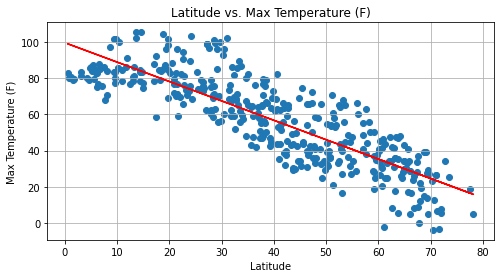

Regression line equation is: y = -1.07x + 99.6
The r-squared is: -0.8460782306171106


In [20]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_max_temp)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(north_lat,north_max_temp)
plt.plot(north_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Max Temperature (F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

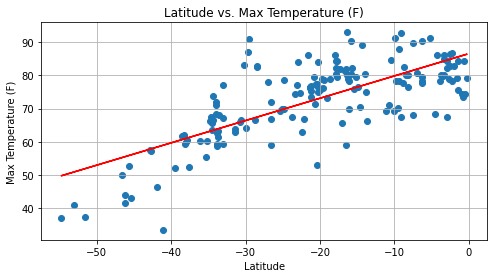

Regression line equation is: y = 0.67x + 86.53
The r-squared is: 0.7402446837280692


In [21]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_max_temp)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(south_lat,south_max_temp)
plt.plot(south_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Max Temperature (F)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

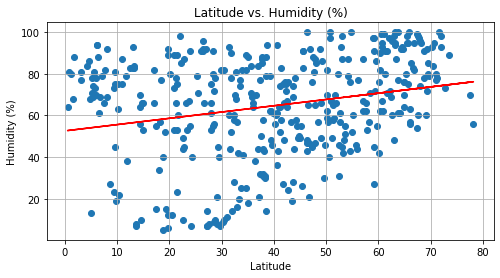

Regression line equation is: y = 0.3x + 52.6
The r-squared is: 0.24087385103408754


In [22]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_humidity)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(north_lat,north_humidity)
plt.plot(north_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Humidity (%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

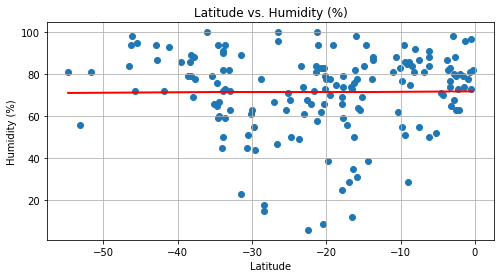

Regression line equation is: y = 0.01x + 71.86
The r-squared is: 0.007717730110365457


In [23]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_humidity)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(south_lat,south_humidity)
plt.plot(south_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Humidity (%)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

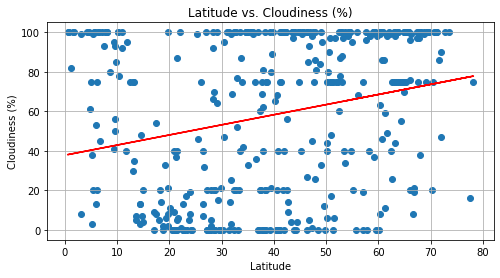

Regression line equation is: y = 0.51x + 37.81
The r-squared is: 0.25185614062212075


In [24]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_cloudiness)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(north_lat,north_cloudiness)
plt.plot(north_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

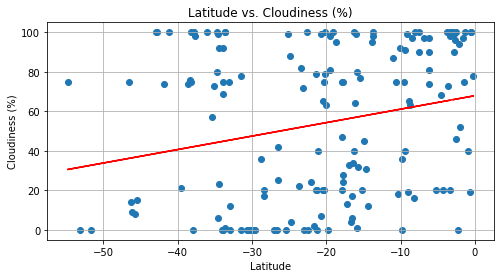

Regression line equation is: y = 0.68x + 67.91
The r-squared is: 0.23355384477967028


In [25]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_cloudiness)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(south_lat,south_cloudiness)
plt.plot(south_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

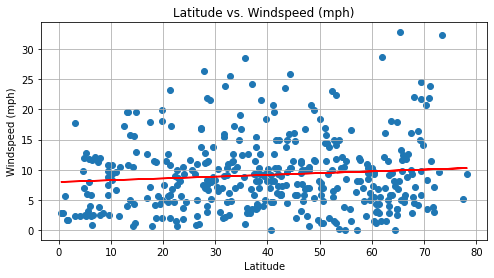

Regression line equation is: y = 0.03x + 7.96
The r-squared is: 0.09500830253043084


In [26]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_lat, north_windspeed)
regress_values = north_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(north_lat,north_windspeed)
plt.plot(north_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Windspeed (mph)")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

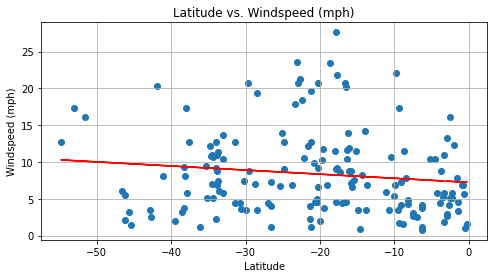

Regression line equation is: y = -0.06x + 7.22
The r-squared is: -0.12883392036995742


In [27]:
#Regression Line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_lat, south_windspeed)
regress_values = south_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Size
plt.figure(figsize=(8,4))

# Create Plot
plt.scatter(south_lat,south_windspeed)
plt.plot(south_lat,regress_values,"r-")

# Create Labels and Title
plt.title("Latitude vs. Windspeed (mph)")
plt.xlabel('Latitude')
plt.ylabel('Windspeed (mph)')
plt.grid(True)

# Display
plt.show()

# Print
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")